# WF Sims

## **1**    *Motivating Question and Models*

Given an algorithm Generation on a jar of 10 randomly chosen marbles which are either red or white,

Generation(n):
    pick a marble, $M$, from the jar at random;
    pick a different marble, $M'$, from the jar at random;
    swap the $M$ for a marble of the same color as $M'$.
    
The expected probability of the color of $M'$ is the presence of that color in the jar, excluding $M$.
If one color begins to predominate, the probability of that color increasing its presence is higher than the likelihood of a comeback for the other color.
Furthermore, once a color makes up all of the jar, there is no further change in color. 
I expect that one color will always fill the jar sooner or later. 

### 1.1 Question
What is the average number of iterations until the jar is full?


### 1.2 First Model
Model a bucket of ten items with two phenotypes as the binary expression of an integer $0 < n < 2^{10}-1$.


In [2]:
from random import randint
from matplotlib import pyplot as plt
from statistics import mean, median, stdev, NormalDist
import time
import numpy as np

n = randint(0,1023)
print(n)


1017


Pick a digit at random.
Pick a second, different digit at random.

In [19]:
i = randint(0,9)
pick_1 = 2**i
print(pick_1)
j = randint(0,8)
pick_2 = 2**(j + int(j >= i))
print(pick_2)

4
2


If the pick_2 digit in $n$ is 1, change the pick_1 digit to 1.
Otherwise, change the pick_1 digit to 0.

In [20]:
if n & pick_2 > 0:
    n = n | pick_1
else:
    n = n & (~ pick_1)
print(n)

128


Giving us our desired function, Generate.

In [34]:
def Generate(n):
    i = randint(0,9)
    pick_1 = 2**i
    j = randint(0,8)
    pick_2 = 2**(j + int(j >= i))
    if n & pick_2 > 0:
        n = n | pick_1
    else:
        n = n & (~ pick_1)
    return n

count = 1
t0 = time.time()
n = randint(0,1023)
print("Initial value:",n)
while n != 0 and n != 1023:
    n = Generate(n)
    print("Gen",str(count)+":",n)
    count += 1
t1 = time.time()
print("Total Time:",t1-t0)
#times.append(t1-t0)
    
print(bin(n))




How many iterations:  0


Initial value: 939
Gen 1: 943
Gen 2: 943
Gen 3: 1007
Gen 4: 1007
Gen 5: 495
Gen 6: 495
Gen 7: 495
Gen 8: 495
Gen 9: 495
Gen 10: 495
Gen 11: 495
Gen 12: 495
Gen 13: 495
Gen 14: 487
Gen 15: 487
Gen 16: 485
Gen 17: 501
Gen 18: 501
Gen 19: 373
Gen 20: 885
Gen 21: 881
Gen 22: 881
Gen 23: 881
Gen 24: 817
Gen 25: 817
Gen 26: 817
Gen 27: 945
Gen 28: 945
Gen 29: 945
Gen 30: 947
Gen 31: 947
Gen 32: 947
Gen 33: 951
Gen 34: 951
Gen 35: 951
Gen 36: 919
Gen 37: 919
Gen 38: 951
Gen 39: 951
Gen 40: 951
Gen 41: 951
Gen 42: 951
Gen 43: 951
Gen 44: 951
Gen 45: 695
Gen 46: 695
Gen 47: 567
Gen 48: 551
Gen 49: 551
Gen 50: 551
Gen 51: 551
Gen 52: 679
Gen 53: 679
Gen 54: 935
Gen 55: 951
Gen 56: 1015
Gen 57: 1015
Gen 58: 1015
Gen 59: 1015
Gen 60: 1015
Gen 61: 1015
Gen 62: 1015
Gen 63: 1015
Gen 64: 1015
Gen 65: 1015
Gen 66: 1015
Gen 67: 1015
Gen 68: 503
Gen 69: 503
Gen 70: 511
Gen 71: 511
Gen 72: 511
Gen 73: 511
Gen 74: 511
Gen 75: 511
Gen 76: 511
Gen 77: 511
Gen 78: 511
Gen 79: 511
Gen 80: 511
Gen 81: 511
Gen 



Experimenting with histograms:

How many iterations:  100000


Value 0: 781
Count 0: 13
Time Elapsed: 0.0010039806365966797
Value 10000: 623
Count 10000: 48
Time Elapsed: 2.457263469696045
Value 20000: 85
Count 20000: 12
Time Elapsed: 4.693802833557129
Value 30000: 433
Count 30000: 60
Time Elapsed: 7.006453990936279
Value 40000: 483
Count 40000: 80
Time Elapsed: 9.61548376083374
Value 50000: 980
Count 50000: 75
Time Elapsed: 12.131474494934082
Value 60000: 870
Count 60000: 15
Time Elapsed: 14.19037127494812
Value 70000: 420
Count 70000: 286
Time Elapsed: 16.22065019607544
Value 80000: 97
Count 80000: 42
Time Elapsed: 18.32060742378235
Value 90000: 209
Count 90000: 133
Time Elapsed: 20.404953956604004
Total Time: 22.54343342781067


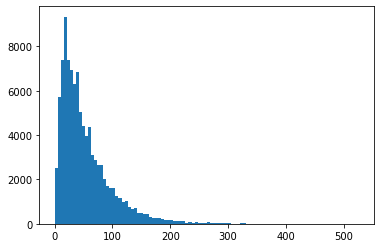

Mean: 53.25042 Median: 40.0 St Dev: 45.106949976616264


In [212]:
iter = int(input("How many iterations: "))
total_time = 0
count_data = []


for i in range(iter):
    count = 0
    t0 = time.time()
    n = randint(0,1023)
    if i%10000 == 0:
        print("Value "+str(i)+":",n)
    
    while n != 0 and n != 1023:
        count += 1
        n = Generate(n)
        #print("Gen",str(count)+":",n)
    t1 = time.time()
    total_time+= t1 - t0
    if i%10000==0:
        print("Count "+str(i)+":",count)
        print("Time Elapsed:",total_time)
    count_data.append(count)

    
print("Total Time:",total_time)
#times.append(t1-t0)

plt.hist(count_data,bins=100)
plt.show()
print("Mean:",mean(count_data),"Median:",median(count_data),"St Dev:",stdev(count_data))

### 1.2 Second Model

This model is more generalizable, although less computationally efficient in the base case.

I model the jar as a Jar object with population and number of phenotypes set by the user. 
The population of the jar is modeled as a dictionary. 

In [213]:
class Jar():
    pop = None
    phen = None
    pool_comp = []
    pool = dict()
    gen_count = 0
    
    def __init__(self,pop,phen):
        self.pop = pop
        self.phen = phen
        self.pool_comp = [0 for i in range(phen)]
        for i in range(pop):
            next = randint(0,phen-1)
            self.pool[i] = next
            self.pool_comp[next] += 1
        
            
    def generate(self):
        key_1 = randint(0,self.pop-1)
        key_2 = randint(0,self.pop-2)
        key_2 += int(key_2 >= key_1)
        
        #print(key_1,key_2)
        
        a = self.pool[key_1]
        b = self.pool[key_2]
        self.pool[key_1] = self.pool[key_2]
        if a != b:
            self.pool_comp[a] -= 1
            self.pool_comp[b] += 1
            
        self.gen_count += 1
         
    
    def dump(self):
        return str(self.pop) + ", " + str(self.phen) + ", " + str(self.pool_comp) + ", " + str(self.pool) + ", " +  str(self.gen_count)
    
    def is_done(self):
        if max(self.pool_comp) == self.pop: return True
        return False
    


j = Jar(10,2)
print(j.dump())
while not j.is_done():
    j.generate()

print(j.dump())
print(j.gen_count)




10, 2, [3, 7], {0: 1, 1: 1, 2: 1, 3: 0, 4: 1, 5: 0, 6: 0, 7: 1, 8: 1, 9: 1}, 0
10, 2, [0, 10], {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}, 183
183


Jar Experiment
**************



How Many Marbles:  10
How Many Colors:  2
How many iterations:  100000


Count 0: 2
Time Elapsed: 0.0009958744049072266
Count 10000: 114
Time Elapsed: 2.3297581672668457
Count 20000: 104
Time Elapsed: 4.68178391456604
Count 30000: 3
Time Elapsed: 7.3491997718811035
Count 40000: 74
Time Elapsed: 9.804757595062256
Count 50000: 13
Time Elapsed: 12.401286125183105
Count 60000: 35
Time Elapsed: 14.892069816589355
Count 70000: 30
Time Elapsed: 17.412832021713257
Count 80000: 38
Time Elapsed: 19.680789947509766
Count 90000: 79
Time Elapsed: 22.244836807250977
Total Time: 24.86868405342102


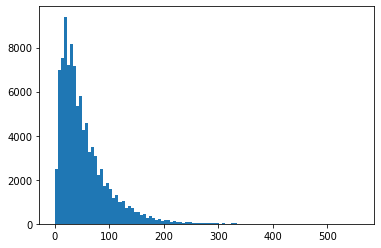

Mean: 53.46753 Median: 40.0 St Dev: 45.32448310556655


In [214]:
print("Jar Experiment")
print("**************")
print()

pop = int(input("How Many Marbles: "))
phen = int(input("How Many Colors: "))
iter = int(input("How many iterations: "))
total_time = 0

count_data = []
total_time = 0

for i in range(iter):
    t0 = time.time()
    j = Jar(pop,phen)
    while not j.is_done():
        j.generate()
    count_data.append(j.gen_count)
    t1 = time.time()
    total_time += t1 - t0
    if i%10000 == 0:
        print("Count "+str(i)+":",j.gen_count)
        print("Time Elapsed:", total_time)
    

print("Total Time:",total_time)

plt.hist(count_data,bins=100)
plt.show()
print("Mean:",mean(count_data),"Median:",median(count_data),"St Dev:",stdev(count_data))


    

## **2**    *Probability of Fixation*
Let's define ***fixation*** as the state when a jar is fully occupied by one color of marble and cannot change with any more generations. 

In the case of white and red marbles, there are _two fixations_. The jar can be filled with _all white marbles_ or _all red marbles_. So for $n$ phenotypes, there are $n$ fixations.

The ***rate of fixation*** is the probability distribution of fixation over each color. So we count up all the fixations on each color and divide that by the total number of samples.

The _initial conditions_ of the experiment above were the number of marbles and the number of colors or phenotypes. Now add the _probability distribution_ of the colors when they are first picked to the initial conditions. 

In the first question, when the colors are assigned I assumed the probability for each color was equal.

### 2.1 Question
How does probability distribution of color assignment affect the rate of fixation?
We'll start with a probability distribution of 1 red : 9 white marbles.



In [2]:
import numpy as np

mean = [0, 0]
cov = [[1, 0], [0, 100]]  # diagonal covariance

'''
print(list(np.random.binomial(10,0.1,10)))
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()
'''

d = np.random.multinomial(10, [0.1,0.9], size=None)
print(d)

[1 9]


### Adding probability functionality to the Jar Class

In [3]:
class Jar():
    pop = None
    phen = None
    pool_comp = []
    pool = dict()
    gen_count = 0
    
    def __init__(self,pop,phen,*args):
        self.pop = pop
        self.phen = phen
        
        #creating the pool and pool_comp with a multinomial ndarray
        #only accept first phen elements
        if not len(args) == 0:
            probs = []
            for i in range(phen):
                probs.append(args[0][i])
            
        else: probs = [0.5 for i in range(phen)]
        
        self.pool_comp = np.random.multinomial(pop,probs)
        count = 0
        for i in range(len(self.pool_comp)):
            for j in range(self.pool_comp[i]):
                self.pool[count] = i
                count += 1
            
    def generate(self):
        key_1 = randint(0,self.pop-1)
        key_2 = randint(0,self.pop-2)
        key_2 += int(key_2 >= key_1)
        
        #print(key_1,key_2)
        
        a = self.pool[key_1]
        b = self.pool[key_2]
        self.pool[key_1] = self.pool[key_2]
        if a != b:
            self.pool_comp[a] -= 1
            self.pool_comp[b] += 1
            
        self.gen_count += 1
         
    
    def dump(self):
        return str(self.pop) + ", " + str(self.phen) + ", " + str(self.pool_comp) + ", " + str(self.pool) + ", " +  str(self.gen_count)
    
    def is_done(self):
        if max(self.pool_comp) == self.pop: return True
        return False
    
j = Jar(10,2,[0.1,0.9])
print(j.dump())
j.generate()
print(j.dump())

10, 2, [ 0 10], {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}, 0
10, 2, [ 0 10], {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}, 1


In [70]:
Jar(10,2).dump()

'10, 2, [4 6], {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}, 0'

In [7]:
d = np.random.multinomial(10, [0.1,0.9])



10 2 [0.5, 0.5] [6 4]
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
0


Need to run an experiment where I collect
probabilities of fixation for 
initial probabilities from [0.1,0.9] - [0.5,0.5]
Probability of left-fixation = number of left fixations/number of fixations



#### Confidence Intervals

The formula for confidence intervals is 
$$
\left( \bar{x} - z^*\frac{\sigma}{\sqrt{n}}, \bar{x} + z^*\frac{\sigma}{\sqrt{n}}\right),
$$

where $\bar{x}$ is the mean, $\sigma$ is the standard deviation, $n$ is the number of observations, and $z^* = -\Phi^{-1}(\frac{\alpha}{2})$, where $\alpha$ is $1$ minus the confidence, and $\Phi$ is the cumulative distribution function on the normal distribution of our data.

For our purposes, we only need to calculate
$$
z^*\frac{\sigma}{\sqrt{n}}.
$$

In [294]:
from math import sqrt

def confidence_interval(data,alpha):
    dist = NormalDist.from_samples(data)
    z = -NormalDist().inv_cdf(alpha / 2.)
    sigma = stdev(data)
    return z*(sigma/sqrt(len(data)))
    


.--------------.
|Jar Experiment|
*--------------*



How Many Marbles:  10
How Many Colors:  2
How many iterations:  1000


Sampling from Probabilities: [0.01, 0.99]
Count 0: 0
Sampling from Probabilities: [0.03, 0.97]
Count 0: 0
Sampling from Probabilities: [0.1, 0.9]
Count 0: 3
Sampling from Probabilities: [0.2, 0.8]
Count 0: 1
Sampling from Probabilities: [0.3, 0.7]
Count 0: 11
Sampling from Probabilities: [0.4, 0.6]
Count 0: 16
Sampling from Probabilities: [0.5, 0.5]
Count 0: 12
Sampling from Probabilities: [0.6, 0.4]
Count 0: 103
Sampling from Probabilities: [0.7, 0.30000000000000004]
Count 0: 6
Sampling from Probabilities: [0.8, 0.19999999999999996]
Count 0: 8
Sampling from Probabilities: [0.9, 0.09999999999999998]
Count 0: 23
Sampling from Probabilities: [0.97, 0.030000000000000027]
Count 0: 1
Sampling from Probabilities: [0.99, 0.010000000000000009]
Count 0: 0


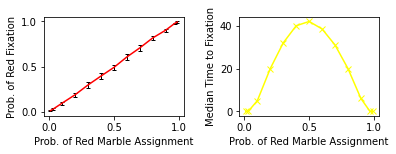

9.33 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [71]:
%%timeit -n 1 -r 1

left_fixations = dict()

#want to plot
#x-axis: left assignment probability
#y-axis 1: probability of left-fixation - count up all left fixations/all fixations
#y-axis 2: avg time to fixation - median of all generation counts

fix_prob = []
fix_prob_error = []

avg_time = []
assign_probs = [0.01,0.03,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.97,0.99]

print(".--------------.")    
print("|Jar Experiment|")
print("*--------------*")
print()

pop = int(input("How Many Marbles: "))
phen = int(input("How Many Colors: "))
iter = int(input("How many iterations: "))

for prob_left in assign_probs:
    probs = [prob_left,1.0-prob_left]
    print("Sampling from Probabilities:",probs)
    count_data = []
    color_data = [0,0]
    is_red_fix = []
    
    for i in range(iter):
        j = Jar(pop,phen,probs)
        while not j.is_done():
            j.generate()
        if j.pool[0] == 0: 
            color_data[0] += 1
            is_red_fix.append(1)
        else:
            is_red_fix.append(0)
        color_data[1] += 1
        count_data.append(j.gen_count)
        if i%1000 == 0:
            print("Count "+str(i)+":",j.gen_count)
            
    avg_time.append(median(count_data))
    
    fix_prob.append(color_data[0]/color_data[1])
    fix_prob_error.append(confidence_interval(is_red_fix,0.05))

plt.figure()

plt.subplot(221)
plt.errorbar(assign_probs, fix_prob,yerr=fix_prob_error,xerr=None,color='red',elinewidth=1,ecolor='black',capsize=2)
plt.xlabel("Prob. of Red Marble Assignment")
plt.ylabel("Prob. of Red Fixation")

plt.subplot(222)
plt.plot(assign_probs, avg_time,color='yellow',marker='x')
plt.xlabel("Prob. of Red Marble Assignment")
plt.ylabel("Median Time to Fixation")

plt.subplots_adjust(wspace=0.4)

plt.show()


### 2.2 More Phenotypes

What if we add more phenotypes? How does that impact the probability of red fixation?

Say we have red, white, and black marbles. Say the initial assignment probabilities are [0.4,0.3,0.3]. What is the probability of red fixation? What is the average time to fixation?



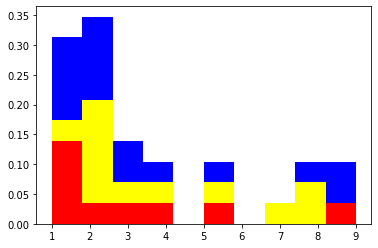

In [84]:
data = [[1,1,1,1,2,3,4,5,9],[1,2,2,2,2,2,3,4,5,7,8,8],[1,1,1,2,2,2,2,1,3,3,4,5,8,9,9]]
plt.hist(data,density=True,histtype='bar', stacked=True, color=['red','yellow','blue'])
plt.show()

.--------------.
|Jar Experiment|
| Three Colors |
*--------------*

Count 0: 178
Count 1000: 12
Count 2000: 75
Count 3000: 46
Count 4000: 60



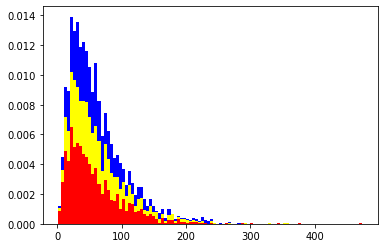

Fixations data: Mean: 62.4626 Median: 51.0 St Dev: 45.341148697326126
Initial Probabilities: [0.4, 0.3, 0.3]
Red Fixation Rate: 0.4002
Yellow Fixation Rate: 0.293
Blue Fixation Rate: 0.3068
4.85 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [89]:
%%timeit -n 1 -r 1

red_fixations = dict()

#want to plot
#histogram of fixations by time to fixation,  number, split up into three chunks by phenotype


avg_time = []

print(".--------------.")    
print("|Jar Experiment|")
print("| Three Colors |")
print("*--------------*")
print()

pop = 10#int(input("How Many Marbles: "))
phen = 3#int(input("How Many Colors: "))
iter = 5000#int(input("How many iterations: "))

probs = [0.4,0.3,0.3]
red_fix = []
yellow_fix = []
blue_fix = []
count_data = []

for i in range(iter):
    j = Jar(pop,phen,probs)
    while not j.is_done():
        j.generate()
    if j.pool[0] == 0: 
        red_fix.append(j.gen_count)
    elif j.pool[0] == 1:
        yellow_fix.append(j.gen_count)
    else:
        blue_fix.append(j.gen_count)
        
    count_data.append(j.gen_count)
    if i%1000 == 0:
        print("Count "+str(i)+":",j.gen_count)

plt.hist([red_fix,yellow_fix,blue_fix],bins=100,histtype='bar',density=True,stacked=True,color=['red','yellow','blue'],label=['red fixations','yellow fixations','blue fixations'])

print()

plt.show()

print("Fixations data: Mean:",mean(count_data),"Median:",median(count_data),"St Dev:",stdev(count_data))
print("Initial Probabilities:",probs)
print("Red Fixation Rate:",len(red_fix)/len(count_data))
print("Yellow Fixation Rate:",len(yellow_fix)/len(count_data))
print("Blue Fixation Rate:",len(blue_fix)/len(count_data))

In [18]:
j = Jar(10,3,[0.4,0.3,0.3])
print(j.dump())
for i in range(10):
    j.generate()
print(j.dump())
print([1,2] + [2,3])

10, 3, [5 3 2], {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1, 8: 2, 9: 2}, 0
10, 3, [8 1 1], {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 2}, 10
[1, 2, 2, 3]


## ***3*** *Adding More Marbles*

### 3.1 Question

What is the relationship between number of marbles and average time to fixation?

The impact of one marble on the composition of a jar is $\frac{1}{n}$, where $n$ is the population. Therefore as $n$ grows, I expect the average time to fixation to grow at least linearly with $n$.

### 3.2 Experiment 1

Plot time to fixation with $n$ from [10,31,100,310,1000,3100,10000].

Number of runs per value: 500.

**Output**:

Histogram for each value of $n$.
Plot of $n$ vs average time to fixation with confidence intervals.

Plot of $\log(n)$ vs $\log($average time to fixation$)$ with confidence intervals.

#### **** Test ****

Creating and testing a function `plot_count_hist` to streamline histogram plotting.

In [182]:
def plot_count_hist(color_data,*args):
    t = ''
    if len(args) != 0:
        t = args[0]
    plt.hist(color_data,bins=100,histtype='bar',density=True,stacked=True,color=['red','yellow'],label=['red fixations','yellow fixations'])
    plt.xlabel('Time to fixation')
    plt.ylabel('Number of Fixations')
    plt.title(t)
    plt.show()

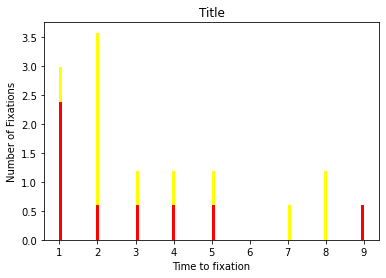

In [185]:
plot_count_hist([[1,1,1,1,2,3,4,5,9],[1,2,2,2,2,2,3,4,5,7,8,8]],'Title')

.--------------.
|Jar Experiment|
| More Marbles |
*--------------*

Value of n: 10
Time Elapsed: 0.0009915828704833984
j = 0
j = 100
j = 200
j = 300
j = 400
Value of n: 31
Time Elapsed: 0.2496812343597412
j = 0
j = 100
j = 200
j = 300
j = 400
Value of n: 100
Time Elapsed: 2.2258033752441406
j = 0
j = 100
j = 200
j = 300
j = 400
Value of n: 310
Time Elapsed: 24.685993194580078
j = 0
j = 100
j = 200
j = 300
j = 400
Value of n: 1000
Time Elapsed: 244.31424164772034
j = 0
j = 100
j = 200
j = 300
j = 400


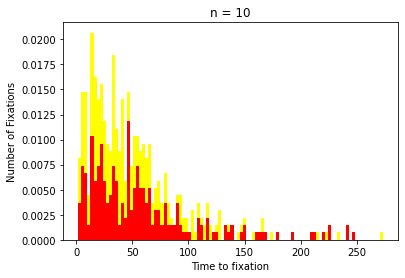

Mean: 53.38 Median: 41.0 St Dev: 46.305334119687245


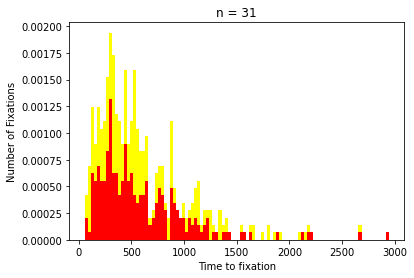

Mean: 596.648 Median: 481.0 St Dev: 441.6402294634866


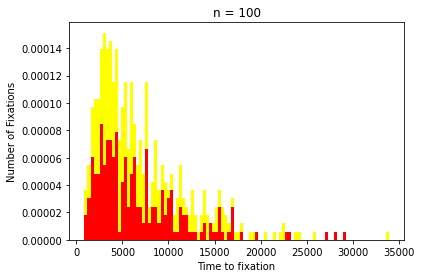

Mean: 7073.974 Median: 5516.5 St Dev: 5150.455089463568


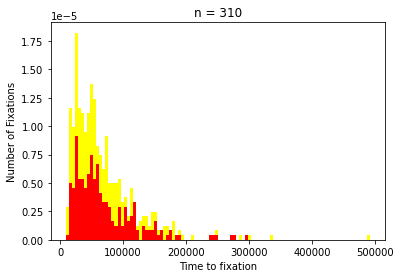

Mean: 68966.608 Median: 53529.5 St Dev: 53960.83706719458


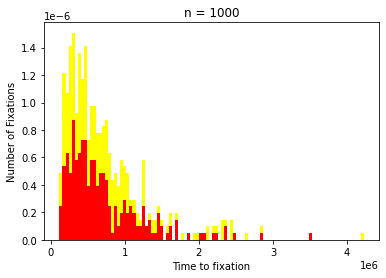

Mean: 715712.716 Median: 562445.0 St Dev: 548040.9714753329


AttributeError: 'AxesSubplot' object has no attribute 'plt'

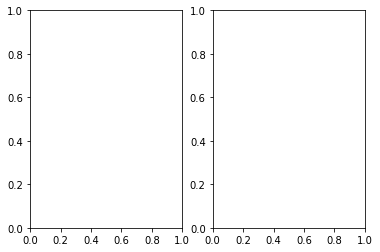

In [5]:
%timeit -n 1 -r 1
print(".--------------.")    
print("|Jar Experiment|")
print("| More Marbles |")
print("*--------------*")
print()

pops = [10,31,100,310,1000]#,3100,10000]
phen = 2#int(input("How Many Colors: "))
loops = 500#int(input("How many iterations: "))
total_time = 0

color_data = []
t0 = time.time()

for i in range(len(pops)):
    red = []
    yellow = []
    print("Value of n:",pops[i])
    tn = time.time()
    print("Time Elapsed:", tn-t0)
    
    for j in range(loops):
        if j%100 == 0:
            print("j =",j)
        jar = Jar(pops[i],phen)
        
        while not jar.is_done():
            jar.generate()
        
        if jar.pool[0] == 0:
            red.append(jar.gen_count)
        else:
            yellow.append(jar.gen_count)
    color_data.append([red,yellow])

means = []
medians = []
    
for i in range(len(color_data)):
    title = 'n = {0}'.format(pops[i])
    
    plot_count_hist(color_data[i], title)
    agg = color_data[i][0] + color_data[i][1]
    me = mean(agg)
    md = median(agg)
    means.append(me)
    medians.append(md)
    print("Mean:",me,"Median:",md,"St Dev:",stdev(color_data[i][0]+color_data[i][1]))
    
    

    




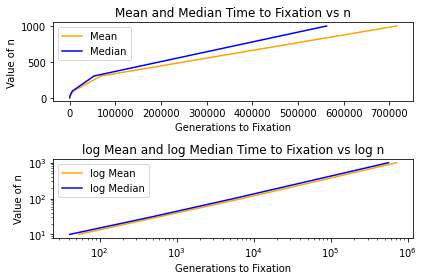

In [17]:
#graphing n vs mean and median time to fixation
#including log
    
fig, ((ax1, ax2)) = plt.subplots(2,1)

#mean and median

#mean
ax1.plot(means,pops,color='orange')
#median
ax1.plot(medians,pops,color='blue')
ax1.set(title="Mean and Median Time to Fixation vs n")
ax1.legend(["Mean", "Median"])
ax1.set(xlabel="Generations to Fixation")
ax1.set(ylabel="Value of n")

#log mean and log median
ax2.set(title="log Mean and log Median Time to Fixation vs log n")
#mean
ax2.loglog(means,pops,color='orange')
#median
ax2.loglog(medians,pops,color='blue')
ax2.legend(["log Mean", "log Median"])
ax2.set(xlabel="Generations to Fixation")
ax2.set(ylabel="Value of n")

#plt.subplots_adjust(wspace=4)
fig.tight_layout()
plt.show()

### 3.3 Results and Future Improvements

- As in the above graphs, time to fixation $T(n)$ is $\Theta(n^2)$, at least for values of $n \leq 1000$. 

- A desirable improvement would be an algorithm to measure $T(n)$ without having call `generate` $T(n)$ times.


## ***4*** *Whole-Jar Shuffling*

Up until now we have selected one marble at a time for change. Suppose we shuffled every marble in the jar at once.

We will add a new function `shuffle` to the `Jar` class which repopulates the jar from a multinomial distribution sampled from the phenotypic distribution of the current jar.

### 4.1 Question 1

What effect will shuffling the whole jar all at once have on the average time to fixation?



In [1]:
from random import randint
from matplotlib import pyplot as plt
from statistics import mean, median, stdev, NormalDist
import time
import numpy as np

#### Adding Shuffle Functionality to the Jar Class

In [331]:
class Jar():
    pop = None
    phen = None
    pool = dict()
    pool_comp = []
    probs = []
    gen_count = 0
    fix = None
    
    def __init__(self,pop,phen,*args):
        self.pop = pop
        self.phen = phen
        
        #creating the pool and pool_comp with a multinomial ndarray
        #only accept first phen elements
        if not len(args) == 0:
            probs = []
            for i in range(phen):
                probs.append(args[0][i])
            self.probs = probs
            
        else: 
            probs = [0.5 for i in range(phen)]
            self.probs = probs
        
        self.pool_comp = np.random.multinomial(pop,probs)
        
        self.__populate_pool__()
        
    def __as_probs__(self): return [phen_count/self.pop for phen_count in self.pool_comp]
    
    def __populate_pool__(self):
        count = 0
        for i in range(self.phen):
            for j in range(self.pool_comp[i]):
                self.pool[count] = i
                count += 1
                
    '''
    ##### An alternative generate algorithm which disposes of the pool dictionary. 
    ##### In experiments, it reduced average time to fixation for some reason.
    
    def generate_alt(self):
        
        probs = self.as_probs()
        
        #get digit for changing and digit to change to
        picks = np.random.choice(self.phen,2,probs)
        
        #change pool comp
        if picks[0] != picks[1]:
            self.pool_comp[picks[0]] -= 1
            self.pool_comp[picks[1]] += 1
        
        self.gen_count += 1
    '''        
        
    def generate(self):
        key_1 = np.random.randint(0,self.pop)
        key_2 = np.random.randint(0,self.pop-1)
        key_2 += int(key_2 >= key_1)
        
        a = self.pool[key_1]
        b = self.pool[key_2]
        self.pool[key_1] = self.pool[key_2]
        if a != b:
            self.pool_comp[a] -= 1
            self.pool_comp[b] += 1
            
        self.gen_count += 1
        
        
    def shuffle(self):
        probs = self.__as_probs__()
        self.pool_comp = np.random.multinomial(self.pop,probs)
        self.__populate_pool__()
        self.gen_count += 1
    
    def dump(self):
        return str(self.pop) + ", " + str(self.phen) + ", " + str(self.pool_comp) + ", " + str(self.pool) + ", " +  str(self.gen_count)
    
    def is_done(self):
        for i in range(self.phen):
            if self.pool_comp[i] == self.pop: 
                self.fix = i
                return True
        return False

#### 4.1.1 Experiment 1 

Run 5000 `shuffle` and 5000 `generate`.

.--------------.
|Jar Experiment|
|  Whole  Jar  |
*--------------*



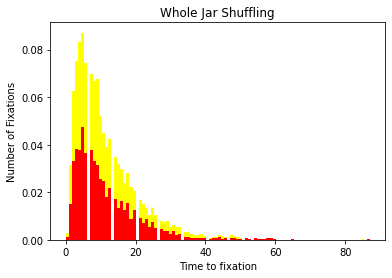

Mean: 11.4286 Median: 9.0 St Dev: 9.243786646083501


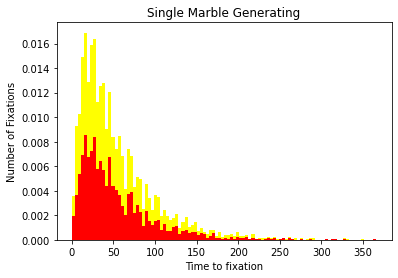

Mean: 53.8762 Median: 41.0 St Dev: 45.95563575505762
9.64 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [332]:

%%timeit -r 1 -n 1

print(".--------------.")    
print("|Jar Experiment|")
print("|  Whole  Jar  |")
print("*--------------*")
print()

data = [[],[]]

pop = 10
phen = 2
probs = [0.5,0.5]
runs = 5000

#***************************************************************
#SHUFFLE EXPERIMENTS
#***************************************************************

for i in range(runs):
    print("Run Number: %d\r"%i,end="")
    j = Jar(pop,phen,probs)
    while not j.is_done():
        j.shuffle()
    data[j.fix].append(j.gen_count)
        
        
plot_count_hist(data,'Whole Jar Shuffling')

agg = data[0] + data[1]
print("Mean:",mean(agg),"Median:",median(agg),"St Dev:",stdev(agg))

#***************************************************************
#GENERATE EXPERIMENTS
#***************************************************************
data = [[],[]]

for i in range(runs):
    print("Run Number: %d\r"%i,end="")
    j = Jar(pop,phen,probs)
    while not j.is_done():
        j.generate()
    data[j.fix].append(j.gen_count)
        
        
plot_count_hist(data,'Single Marble Generating')

agg = data[0] + data[1]
print("Mean:",mean(agg),"Median:",median(agg),"St Dev:",stdev(agg))

### 4.2 Question 2

I define `shuffle` specifically as taking a random subset $K$ of marbles from the jar $J$ and re-assigning them according to the population distribution within $K$.

Suppose some number of marbles are shuffled at each generation, not necessarily all of them. What is the relationship between number of marbles shuffled in each generation and average time to fixation?

Note that `shuffle` and `generate` are meaningfully different in operation. Consider `shuffle` acting on one marble. 

#### 4.2.1 Experiment 2

First we add an argument $n$ to the shuffle method which tells it to shuffle only $n$ marbles in the jar.

In [326]:
class Jar():
    pop = None
    phen = None
    pool = dict()
    pool_comp = []
    probs = []
    gen_count = 0
    fix = None
    
    def __init__(self,pop,phen,*args):
        self.pop = pop
        self.phen = phen
        
        #creating the pool and pool_comp with a multinomial ndarray
        #only accept first phen elements
        if not len(args) == 0:
            probs = []
            for i in range(phen):
                probs.append(args[0][i])
            self.probs = probs
            
        else: 
            probs = [0.5 for i in range(phen)]
            self.probs = probs
        
        self.pool_comp = np.random.multinomial(pop,probs)
        
        self.__populate_pool__()
        
    def __as_probs__(self, *args): 
        if len(args) == 0:
            return [phen_count/self.pop for phen_count in self.pool_comp]
        else:
            comp = args[0]
            pop = sum(comp)
            return [phen_count/pop for phen_count in comp]
        
    def __populate_pool__(self):
        count = 0
        for i in range(self.phen):
            for j in range(self.pool_comp[i]):
                self.pool[count] = i
                count += 1
        
    def generate(self):
        key_1 = np.random.randint(0,self.pop)
        key_2 = np.random.randint(0,self.pop-1)
        key_2 += int(key_2 >= key_1)
        
        a = self.pool[key_1]
        b = self.pool[key_2]
        self.pool[key_1] = self.pool[key_2]
        if a != b:
            self.pool_comp[a] -= 1
            self.pool_comp[b] += 1
            
        self.gen_count += 1
        
        
    def shuffle(self,*args):
        probs = self.__as_probs__()
        if len(args) != 0:
            n = args[0]
            #need n randomly selected from pool_comp
            change_indices = np.random.choice(self.pop,n,replace=False)
            for_changing = [0 for i in range(self.phen)]
            for i in range(n):
                for_changing[self.pool[change_indices[i]]] += 1
                
            leftovers = [self.pool_comp[i] - for_changing[i] for i in range(self.phen)]
            sub_probs = self.__as_probs__(for_changing)
            
            change_to = np.random.multinomial(n,sub_probs)
            
            self.pool_comp = [leftovers[i] + change_to[i] for i in range(self.phen)]
            
            #print(change_indices,for_changing,leftovers,sub_probs,change_to)
        else:
            self.pool_comp = np.random.multinomial(self.pop,probs)
            
        self.__populate_pool__()
        self.gen_count += 1
    
    def dump(self):
        return str(self.pop) + ", " + str(self.phen) + ", " + str(self.pool_comp) + ", " + str(self.pool) + ", " +  str(self.gen_count)
    
    def is_done(self):
        for i in range(self.phen):
            if self.pool_comp[i] == self.pop: 
                self.fix = i
                return True
        return False

#### **** Test ****

Checking to see if `shuffle(10)` behaves.

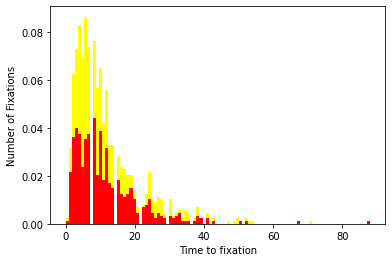

11.588 9.0 9.912341323345887


In [328]:
#print(np.random.multinomial(8,[0.5,0.5]))
data = [[],[]]
for i in range(1000):
    j = Jar(10,2)
    while not j.is_done():
        j.shuffle(10)
    data[j.fix].append(j.gen_count)


plot_count_hist(data)
agg = data[0] + data[1]
print(mean(agg), median(agg), stdev(agg))

***Want:*** Graph of number of marbles shuffled versus average time to fixation.

***Method:*** For each of the numbers 2 - 10, run 1000 `shuffle`. Collect mean data and 95% confidence intervals.



.--------------.
|Jar Experiment|
| Shuffling  n |
*--------------*

Shuffling 2 Marbles.......


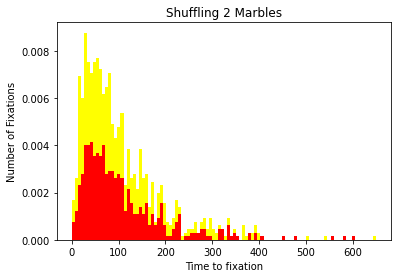

Mean: 105.541 Median: 79.0 St Dev: 90.80882424941731
Shuffling 3 Marbles.......


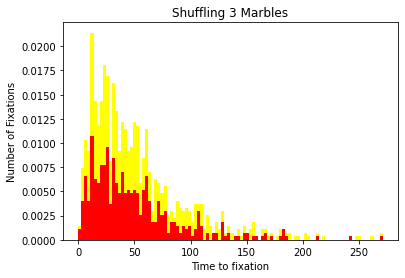

Mean: 52.491 Median: 40.5 St Dev: 43.65833218263118
Shuffling 4 Marbles.......


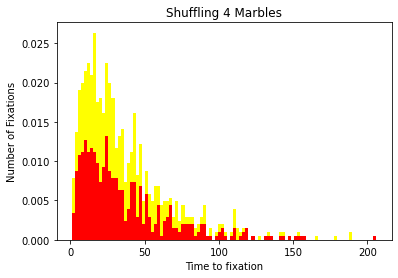

Mean: 36.541 Median: 27.0 St Dev: 30.5203507648718
Shuffling 5 Marbles.......


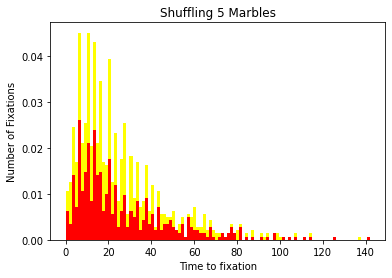

Mean: 25.675 Median: 19.0 St Dev: 21.66200862380074
Shuffling 6 Marbles.......


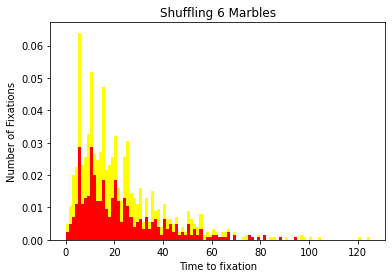

Mean: 22.237 Median: 17.0 St Dev: 17.92350643939637
Shuffling 7 Marbles.......


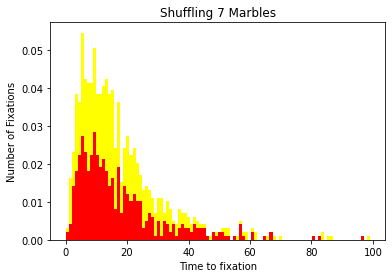

Mean: 17.293 Median: 13.0 St Dev: 14.317127195465266
Shuffling 8 Marbles.......


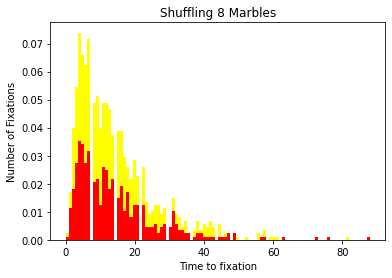

Mean: 14.347 Median: 11.0 St Dev: 11.775026209832497
Shuffling 9 Marbles.......


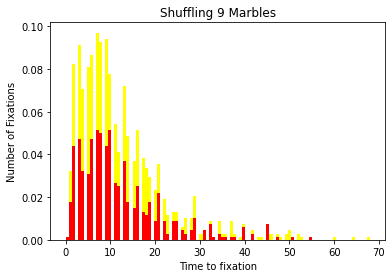

Mean: 12.492 Median: 10.0 St Dev: 10.16992445219547
Shuffling 10 Marbles.......


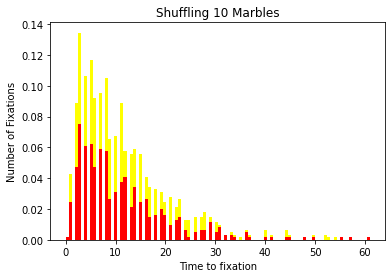

Mean: 11.636 Median: 9.0 St Dev: 9.38837822233668
[105.541, 52.491, 36.541, 25.675, 22.237, 17.293, 14.347, 12.492, 11.636]
[5.628285815920686, 2.705921740549717, 1.8916361788260265, 1.342600533477027, 1.110890025261669, 0.8873684312621911, 0.729810275011019, 0.6303268654383442, 0.5818870183600604]


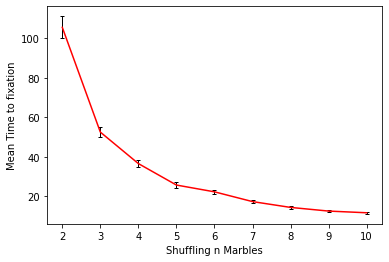

37.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [330]:
%%timeit -r 1 -n 1

print(".--------------.")    
print("|Jar Experiment|")
print("| Shuffling  n |")
print("*--------------*")
print()

data = [[],[]]

pop = 10
phen = 2
probs = [0.5,0.5]
runs = 1000

nums = [i+2 for i in range(9)]

mean_data = []
error_data = []

#***************************************************************
#SHUFFLE EXPERIMENTS
#***************************************************************

for n in nums:
    data = [[],[]]
    print("Shuffling {0} Marbles.......".format(n))
    for i in range(runs):
        prog = (100*i)//runs
        print("Run Progress: %d%%\r" % prog,end="")
        j = Jar(pop,phen,probs)
        while not j.is_done():
            j.shuffle(n)
        data[j.fix].append(j.gen_count)
        
        
    plot_count_hist(data,"Shuffling {0} Marbles".format(n))

    agg = data[0] + data[1]
    me = mean(agg)
    print("Mean:",me,"Median:",median(agg),"St Dev:",stdev(agg))
    mean_data.append(me)
    error_data.append(confidence_interval(agg,0.05))
print(mean_data)
print(error_data)
plt.errorbar(nums,mean_data,yerr=error_data,xerr=None,color='red',elinewidth=1,ecolor='black',capsize=2)
plt.xlabel("Shuffling n Marbles")
plt.ylabel("Mean Time to fixation")

plt.show()

### 4.3 Results and Future Improvements
- 

## ***5*** *External Sources of Diversity*

### 5.1 Question 1

Suppose the population of our jar is subject to infiltration from external marbles. What is the relationship between frequency of infiltration and time to fixation? 

Consider two separate jars. Suppose we periodically move marbles between them. What is the relationship between frequency of marble swaps and average time to fixation in the two jars?

What is the least amount of filtration that will keep the jar unfixed in perpetuity?